# Identifying factors affecting survival of passanger in Titanic using Logistic Regression

# Collecting Data

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the dataset

df = pd.read_csv('Titanic_dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Analyzing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


<AxesSubplot:xlabel='Sex'>

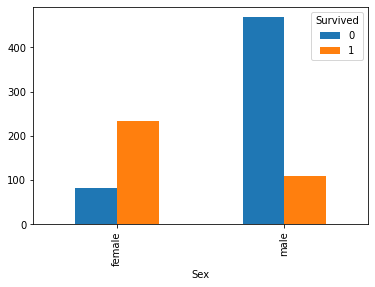

In [5]:
pd.crosstab(df.Sex,df.Survived).plot(kind='bar')

<AxesSubplot:xlabel='Pclass'>

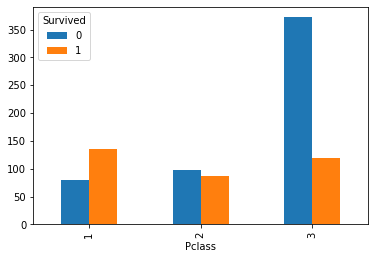

In [6]:
pd.crosstab(df.Pclass,df.Survived).plot(kind='bar')

<AxesSubplot:xlabel='SibSp'>

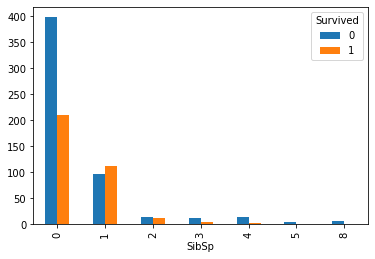

In [7]:
pd.crosstab(df.SibSp,df.Survived).plot(kind='bar')

<AxesSubplot:xlabel='Parch'>

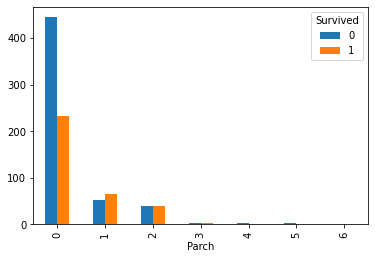

In [8]:
pd.crosstab(df.Parch,df.Survived).plot(kind='bar')

<AxesSubplot:xlabel='Embarked'>

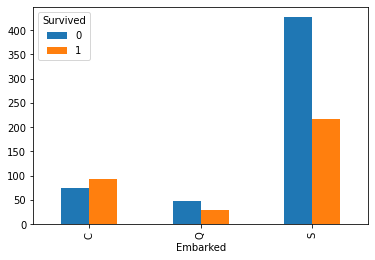

In [9]:
pd.crosstab(df.Embarked,df.Survived).plot(kind='bar')

Columns affecting survival of passengers are
'Age'
'Pclass'
'Sex'
'Sibsp'
'Parch'
'Embarked'
'Fare'

# Data Wrangling

In [10]:
df['Age'].fillna(28,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
subdf = df[['Age','Pclass','Sex','SibSp','Parch','Fare','Embarked']]
subdf

,Age,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,22.0,3,male,1,0,7.2500,S
1,38.0,1,female,1,0,71.2833,C
2,26.0,3,female,0,0,7.9250,S
3,35.0,1,female,1,0,53.1000,S
4,35.0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,27.0,2,male,0,0,13.0000,S
887,19.0,1,female,0,0,30.0000,S
888,28.0,3,female,1,2,23.4500,S
889,26.0,1,male,0,0,30.0000,C


In [12]:
fin_df = pd.get_dummies(subdf,prefix={'Sex','Embarked'})
Pcl = pd.get_dummies(subdf.Pclass,prefix={'Pclass'})

fin_df = pd.concat([fin_df,Pcl],axis='columns')
fin_df.drop('Pclass',axis='columns',inplace=True)
fin_df

,Age,SibSp,Parch,Fare,Embarked_female,Embarked_male,Sex_C,Sex_Q,Sex_S,{'Pclass'}_1,{'Pclass'}_2,{'Pclass'}_3
0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,35.0,0,0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,0,1,0,0,1,0,1,0
887,19.0,0,0,30.0000,1,0,0,0,1,1,0,0
888,28.0,1,2,23.4500,1,0,0,0,1,0,0,1
889,26.0,0,0,30.0000,0,1,1,0,0,1,0,0


# Train & Test

In [13]:
X = fin_df
Y = df.Survived

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.9)

In [15]:
X_train

,Age,SibSp,Parch,Fare,Embarked_female,Embarked_male,Sex_C,Sex_Q,Sex_S,{'Pclass'}_1,{'Pclass'}_2,{'Pclass'}_3
516,34.0,0,0,10.5000,1,0,0,0,1,0,1,0
777,5.0,0,0,12.4750,1,0,0,0,1,0,0,1
376,22.0,0,0,7.2500,1,0,0,0,1,0,0,1
405,34.0,1,0,21.0000,0,1,0,0,1,0,1,0
844,17.0,0,0,8.6625,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
722,34.0,0,0,13.0000,0,1,0,0,1,0,1,0
344,36.0,0,0,13.0000,0,1,0,0,1,0,1,0
599,49.0,1,0,56.9292,0,1,1,0,0,1,0,0
468,28.0,0,0,7.7250,0,1,0,1,0,0,0,1


In [16]:
X_test

,Age,SibSp,Parch,Fare,Embarked_female,Embarked_male,Sex_C,Sex_Q,Sex_S,{'Pclass'}_1,{'Pclass'}_2,{'Pclass'}_3
861,21.0,1,0,11.5000,0,1,0,0,1,0,1,0
628,26.0,0,0,7.8958,0,1,0,0,1,0,0,1
422,29.0,0,0,7.8750,0,1,0,0,1,0,0,1
774,54.0,1,3,23.0000,1,0,0,0,1,0,1,0
706,45.0,0,0,13.5000,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
347,28.0,1,0,16.1000,1,0,0,0,1,0,0,1
507,28.0,0,0,26.5500,0,1,0,0,1,1,0,0
315,26.0,0,0,7.8542,1,0,0,0,1,0,0,1
76,28.0,0,0,7.8958,0,1,0,0,1,0,0,1


In [17]:
Y_train

516    1
777    1
376    1
405    0
844    0
      ..
722    0
344    0
599    1
468    0
339    0
Name: Survived, Length: 801, dtype: int64

In [18]:
Y_test

861    0
628    0
422    0
774    1
706    1
      ..
347    1
507    1
315    1
76     0
39     1
Name: Survived, Length: 90, dtype: int64

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,Y_train)

C:\Users\ASUS\Anaconda3\envs\data_analysis\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
model.coef_

array([[-0.03759243, -0.31916136, -0.10061195,  0.00282341,  1.5886121 ,
        -0.94837252,  0.33078401,  0.33270597, -0.10222822,  1.201038  ,
         0.27892757, -0.839726  ]])

In [21]:
model.intercept_

array([0.78019164])

In [22]:
model.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1], dtype=int64)

# Accuracy Check

In [23]:
model.score(X_test,Y_test)

0.8333333333333334

In [24]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(Y_test,model.predict(X_test))
c_matrix

array([[53,  8],
       [ 7, 22]], dtype=int64)